In [1]:
"""
This script works on TensorFlow 1.x :)
"""
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%pylab inline


print(tf.__version__)

/home/zhangzhiguo/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/zhangzhiguo/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/zhangzhiguo/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/zhangzhiguo/anaconda3/lib/python3.7/site-packages/tensorflow/

Populating the interactive namespace from numpy and matplotlib
1.13.1


In [2]:
def plot_points(x, y, title_name):
    plt.title(title_name)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.scatter(x, y)
    plt.show()

In [3]:
def plot_line(w, b, title_name):
    plt.title(title_name)
    plt.xlabel('x')
    plt.ylabel('y')
    x = np.linspace(0.0, 2.0, num=100)
    y = w * x + b
    plt.plot(x, y)
    plt.show()

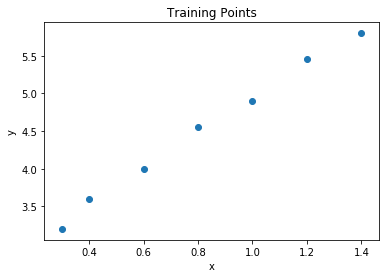

In [4]:
train_X = np.asarray([30.0, 40.0, 60.0, 80.0, 100.0, 120.0, 140.0])
train_Y = np.asarray([320.0, 360.0, 400.0, 455.0, 490.0, 546.0, 580.0])
train_X /= 100.0
train_Y /= 100.0

plot_points(train_X, train_Y, title_name='Training Points')

In [5]:
X = tf.placeholder('float')
y = tf.placeholder('float')
W = tf.Variable(numpy.random.randn(), name='weight')
b = tf.Variable(numpy.random.randn(), name='bias')
n_samples = train_X.shape[0]
y_pred = tf.add(tf.multiply(X, W), b)

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
cost = tf.reduce_sum(tf.pow((y_pred - y), 2))/(2 * n_samples)


learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Instructions for updating:
Use tf.cast instead.


Instructions for updating:
Use `tf.global_variables_initializer` instead.
Iteration: 0001 | Loss: 3.049422 | W: -0.344009 | b: -0.224663


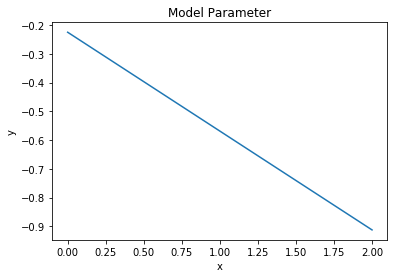

Iteration: 0051 | Loss: 0.537521 | W: 1.152516 | b: 1.454853


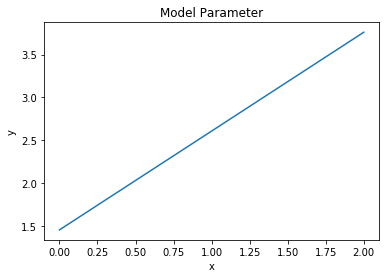

Iteration: 0101 | Loss: 0.093309 | W: 1.785973 | b: 2.161525


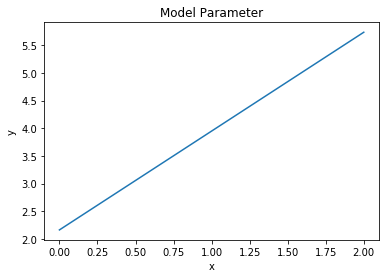

Iteration: 0151 | Loss: 0.015564 | W: 2.055237 | b: 2.457852


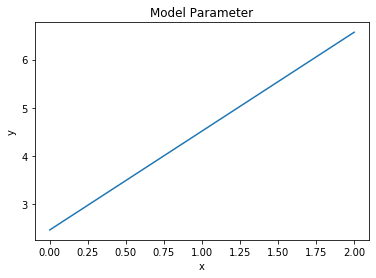

Iteration: 0201 | Loss: 0.002328 | W: 2.170772 | b: 2.581140


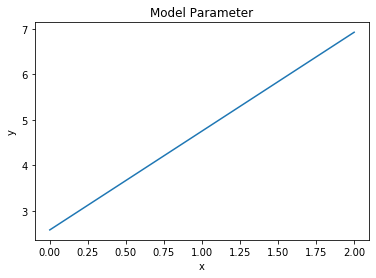

Iteration: 0251 | Loss: 0.000247 | W: 2.221372 | b: 2.631497


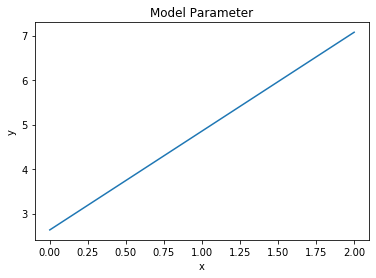

Iteration: 0301 | Loss: 0.000003 | W: 2.244504 | b: 2.651154


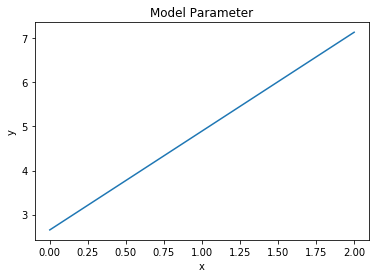

Iteration: 0351 | Loss: 0.000019 | W: 2.255971 | b: 2.657921


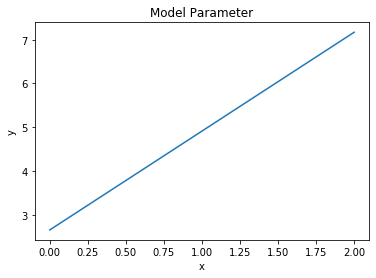

Iteration: 0401 | Loss: 0.000052 | W: 2.262448 | b: 2.659317


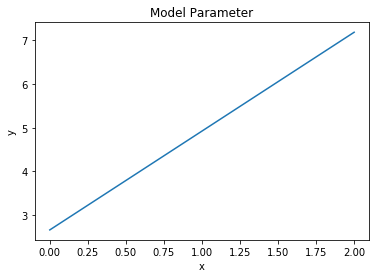

Iteration: 0451 | Loss: 0.000074 | W: 2.266754 | b: 2.658507


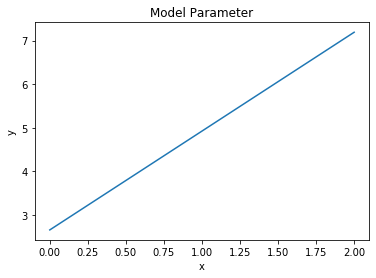

Iteration: 0501 | Loss: 0.000088 | W: 2.270079 | b: 2.656821


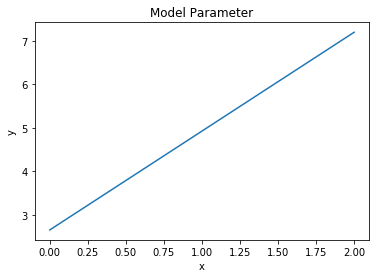

Iteration: 0551 | Loss: 0.000098 | W: 2.272927 | b: 2.654821


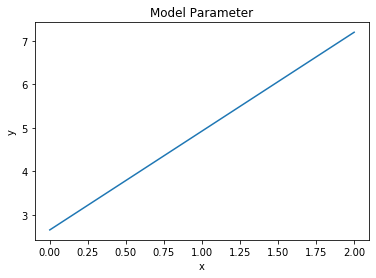

Iteration: 0601 | Loss: 0.000107 | W: 2.275512 | b: 2.652746


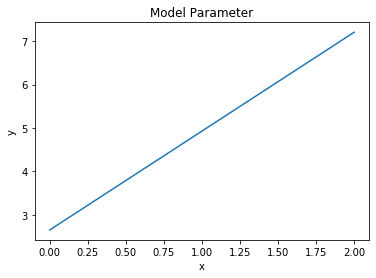

Iteration: 0651 | Loss: 0.000114 | W: 2.277937 | b: 2.650683


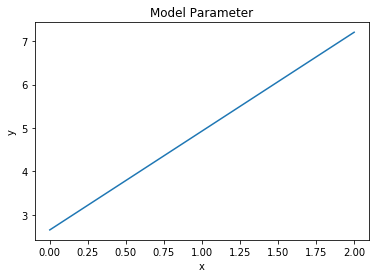

Iteration: 0701 | Loss: 0.000121 | W: 2.280233 | b: 2.648677


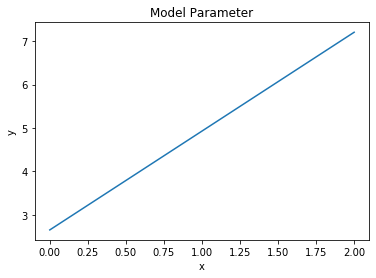

Iteration: 0751 | Loss: 0.000128 | W: 2.282426 | b: 2.646740


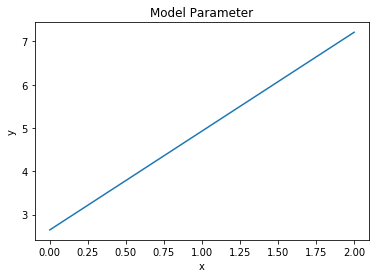

Iteration: 0801 | Loss: 0.000135 | W: 2.284525 | b: 2.644877


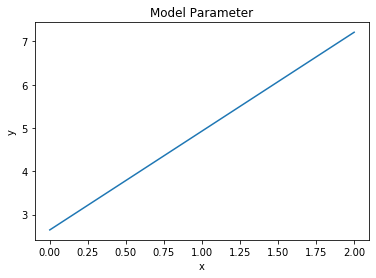

Iteration: 0851 | Loss: 0.000141 | W: 2.286537 | b: 2.643090


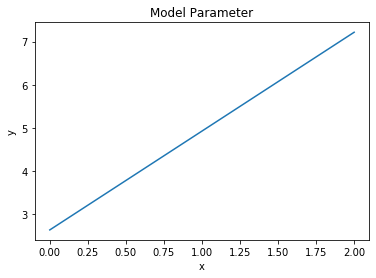

Iteration: 0901 | Loss: 0.000147 | W: 2.288464 | b: 2.641374


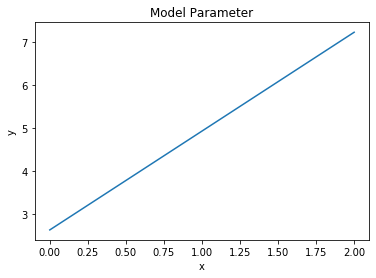

Iteration: 0951 | Loss: 0.000154 | W: 2.290313 | b: 2.639728


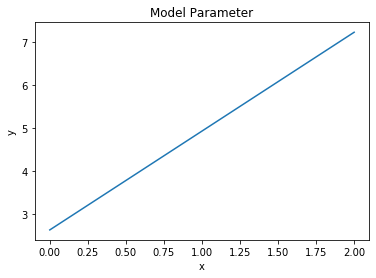

Training loss: 0.000159 | W: 2.292050 | b: 2.638182


In [7]:
training_epochs = 1000
display_step = 50

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    for epoch in range(training_epochs):
        for (x_train, y_train) in zip(train_X, train_Y):
            _, loss, current_W, current_b = sess.run([optimizer, cost, W, b], feed_dict={X: x_train, y: y_train})
        if epoch % display_step == 0:
            print('Iteration: %04d | Loss: %.6f | W: %.6f | b: %.6f'
                  % (epoch + 1, loss, current_W, current_b))
            plot_line(current_W, current_b, 'Model Parameter')
    print('Training loss: %.6f | W: %.6f | b: %.6f' % (loss, sess.run(W), sess.run(b)))
    
